In [4]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy.stats.mstats import winsorize
import plotly.express as px



In [5]:
missing_value=["N/a","na",np.nan]
df1=pd.read_csv('/content/drive/MyDrive/Capstone+Project+1/Credit_card.csv',na_values=missing_value)
df2=pd.read_csv('/content/drive/MyDrive/Capstone+Project+1/Credit_card_label.csv')
df= pd.merge(df1, df2, on='Ind_ID') # merging the output varibale table with the main dataframe

In [6]:
df.head(5)##getting an overview

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [10]:
df.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [8]:
df.shape

(1548, 19)

In [9]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [7]:
#renaming coloumns to same format
column_mapping = { 'GENDER': 'Gender','CHILDREN': 'Children','EDUCATION': 'Education','EMAIL_ID': 'Email_ID'}

df.rename(columns=column_mapping, inplace=True)

In [8]:
df['Gender'].unique()

array(['M', 'F', nan], dtype=object)

In [9]:
df['Type_Income'].unique()

array(['Pensioner', 'Commercial associate', 'Working', 'State servant'],
      dtype=object)

In [10]:
df["Type_Occupation"].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [11]:
df['Type_Income'].value_counts()


Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64

In [12]:
df["Type_Occupation"].value_counts()

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [13]:
df['Gender'].value_counts()

F    973
M    568
Name: Gender, dtype: int64

In [14]:
df['Education'].value_counts()

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: Education, dtype: int64

In [15]:
df.isnull().sum() ## checking for missing values

Ind_ID               0
Gender               7
Car_Owner            0
Propert_Owner        0
Children             0
Annual_income       23
Type_Income          0
Education            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [16]:
df.isnull().sum()/len(df)*100 ##checking the percentage of missing values

Ind_ID              0.000000
Gender              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
Children            0.000000
Annual_income       1.485788
Type_Income         0.000000
Education           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
Email_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

<Axes: xlabel='Birthday_count'>

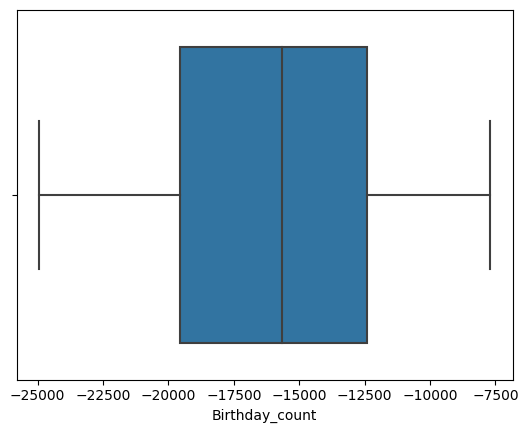

In [18]:
sns.boxplot(x=df['Birthday_count']) #checking outliers

<Axes: xlabel='Annual_income'>

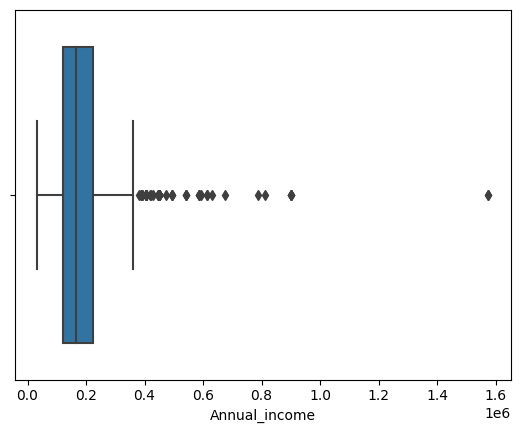

In [19]:
sns.boxplot(x=df['Annual_income'])

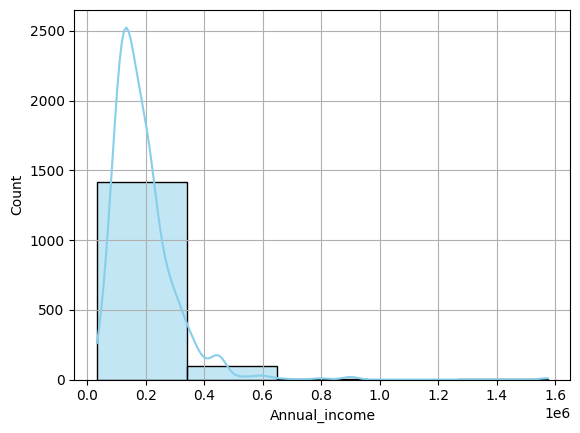

In [20]:
histplot_AI=sns.histplot(df['Annual_income'], bins=5, kde=True, color='skyblue')
ax = histplot_AI.axes
ax.grid(True)

## Data Preprocessing

In [21]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True) #replacing the missing values in Gender column

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   Gender           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [23]:
df = df.drop(columns='Type_Occupation') ##removing Type_occupation since more than 30% of the data is missing


In [24]:
median_Annual_income = df['Annual_income'].median()
df['Annual_income'].fillna(median_Annual_income, inplace=True) #replacing the missing values with median in the Annual_income column

In [25]:
replacement_dict = {'Single / not married': 'Single'}
df['Marital_status'] = df['Marital_status'].replace(replacement_dict)


In [26]:
df['Marital_status'].unique()

array(['Married', 'Single', 'Civil marriage', 'Separated', 'Widow'],
      dtype=object)

In [27]:
mean_Birthday_count = df['Birthday_count'].mean()
df['Birthday_count'].fillna(mean_Birthday_count, inplace=True)#replacing birthday_count missing values

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ind_ID          1548 non-null   int64  
 1   Gender          1548 non-null   object 
 2   Car_Owner       1548 non-null   object 
 3   Propert_Owner   1548 non-null   object 
 4   Children        1548 non-null   int64  
 5   Annual_income   1548 non-null   float64
 6   Type_Income     1548 non-null   object 
 7   Education       1548 non-null   object 
 8   Marital_status  1548 non-null   object 
 9   Housing_type    1548 non-null   object 
 10  Birthday_count  1548 non-null   float64
 11  Employed_days   1548 non-null   int64  
 12  Mobile_phone    1548 non-null   int64  
 13  Work_Phone      1548 non-null   int64  
 14  Phone           1548 non-null   int64  
 15  Email_ID        1548 non-null   int64  
 16  Family_Members  1548 non-null   int64  
 17  label           1548 non-null   i

In [29]:
df.duplicated().sum()#checking for duplicates

0

feature Selection

In [30]:
##replacing output table with Approved or reject to perform feature selection
df['label'] = df['label'].replace({1: 'Reject', 0: 'Accept'})


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ind_ID          1548 non-null   int64  
 1   Gender          1548 non-null   object 
 2   Car_Owner       1548 non-null   object 
 3   Propert_Owner   1548 non-null   object 
 4   Children        1548 non-null   int64  
 5   Annual_income   1548 non-null   float64
 6   Type_Income     1548 non-null   object 
 7   Education       1548 non-null   object 
 8   Marital_status  1548 non-null   object 
 9   Housing_type    1548 non-null   object 
 10  Birthday_count  1548 non-null   float64
 11  Employed_days   1548 non-null   int64  
 12  Mobile_phone    1548 non-null   int64  
 13  Work_Phone      1548 non-null   int64  
 14  Phone           1548 non-null   int64  
 15  Email_ID        1548 non-null   int64  
 16  Family_Members  1548 non-null   int64  
 17  label           1548 non-null   o

In [32]:
from scipy.stats import chi2_contingency##removing unimportant features

contingency_table = pd.crosstab(df['Gender'], df['label'])#N
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi2Stats:', chi2)
print('P_value:', p_value)

Chi2Stats: 2.935630436512684
P_value: 0.08664483091132888


In [33]:
contingency_table = pd.crosstab(df['Car_Owner'], df['label'])#N
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi2Stats:', chi2)
print('P_value:', p_value)

Chi2Stats: 0.24788350240956675
P_value: 0.6185693269675412


In [34]:
contingency_table = pd.crosstab(df['Propert_Owner'], df['label'])#N
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi2Stats:', chi2)
print('P_value:', p_value)

Chi2Stats: 0.38467918054883476
P_value: 0.5351095955412992


In [35]:
contingency_table = pd.crosstab(df['Children'], df['label'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi2Stats:', chi2)
print('P_value:', p_value)

Chi2Stats: 10.890732325835621
P_value: 0.05359000063892279


In [36]:
contingency_table = pd.crosstab(df['Annual_income'],df['label'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi2Stats:', chi2)
print('P_value:', p_value)

Chi2Stats: 153.7274401307049
P_value: 0.007790263351208859


In [37]:
contingency_table = pd.crosstab(df['Type_Income'],df['label'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi2Stats:', chi2)
print('P_value:', p_value)

Chi2Stats: 13.598555653674126
P_value: 0.003505783928580882


In [38]:
contingency_table = pd.crosstab(df['Education'],df['label'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi2Stats:', chi2)
print('P_value:', p_value)

Chi2Stats: 9.205670423908046
P_value: 0.056159329722052835


In [39]:
contingency_table = pd.crosstab(df['Marital_status'],df['label'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi2Stats:', chi2)
print('P_value:', p_value)

Chi2Stats: 10.524107710165312
P_value: 0.03246652787478729


In [40]:
contingency_table = pd.crosstab(df['Housing_type'],df['label'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi2Stats:', chi2)
print('P_value:', p_value)

Chi2Stats: 28.04279521603185
P_value: 3.570429275146809e-05


In [41]:
contingency_table = pd.crosstab(df['Birthday_count'],df['label'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi2Stats:', chi2)
print('P_value:', p_value)

Chi2Stats: 1419.663404167573
P_value: 0.00202992854854058


In [42]:
contingency_table = pd.crosstab(df['Employed_days'],df['label'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi2Stats:', chi2)
print('P_value:', p_value)

Chi2Stats: 1014.3703168854651
P_value: 0.08907335314259698


In [43]:
contingency_table = pd.crosstab(df['Mobile_phone'],df['label'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi2Stats:', chi2)
print('P_value:', p_value)

Chi2Stats: 0.0
P_value: 1.0


In [44]:
contingency_table = pd.crosstab(df['Work_Phone'],df['label'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi2Stats:', chi2)
print('P_value:', p_value)

Chi2Stats: 0.03180437497153464
P_value: 0.8584576855494042


In [45]:
contingency_table = pd.crosstab(df['Phone'],df['label'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi2Stats:', chi2)
print('P_value:', p_value)

Chi2Stats: 0.0
P_value: 1.0


In [46]:
contingency_table = pd.crosstab(df['Family_Members'],df['label'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi2Stats:', chi2)
print('P_value:', p_value)

Chi2Stats: 11.838490556228965
P_value: 0.06567040599527287


In [47]:
df= df.drop('Ind_ID', axis=1)##removing unimportant feature
df=df.drop('Email_ID',axis=1)
df=df.drop('Gender',axis=1)
df=df.drop('Car_Owner',axis=1)
df=df.drop('Housing_type',axis=1)
df=df.drop('Employed_days',axis=1)
df=df.drop('Mobile_phone',axis=1)
df=df.drop('Work_Phone',axis=1)
df=df.drop('Phone',axis=1)






In [48]:
AI=df['Annual_income']

In [49]:
from scipy.stats.mstats import winsorize


In [50]:
#calculating outliers for annual income table
IQR = 225000	- 121500
IQR

103500

In [51]:
#upperlimit
ul= (225000 + 1.5*103500)

In [52]:
ul

380250.0

In [53]:
#lowerlimit
ll=(121500	- 1.5*103500)


In [54]:
ll

-33750.0

In [55]:
df[(df['Annual_income']>380250.0) | (df['Annual_income']<-33750.0)].index

Int64Index([   8,    9,   10,   14,   25,   29,   39,   68,   69,   70,   95,
             150,  151,  153,  154,  169,  170,  171,  188,  204,  211,  233,
             242,  274,  278,  340,  355,  378,  385,  388,  393,  412,  515,
             554,  557,  568,  573,  587,  622,  653,  684,  686,  769,  777,
             811,  884,  885,  908,  912,  962, 1024, 1053, 1055, 1068, 1076,
            1111, 1121, 1175, 1190, 1208, 1287, 1325, 1333, 1350, 1355, 1397,
            1407, 1430, 1457, 1467, 1479, 1495, 1538],
           dtype='int64')

In [56]:
df['Annual_income']=df['Annual_income'].clip(lower=-33750.0, upper=380250.0) #replacing outliers
fig= px.box(df, y="Annual_income")
fig.show()

<Axes: >

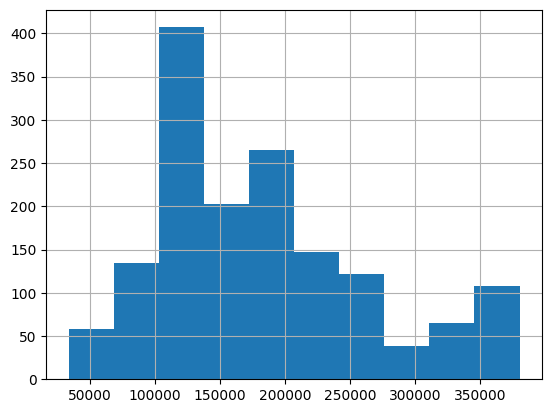

In [57]:
df['Annual_income'].hist()


*Data Wrangling*

In [58]:
df["Education"].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [59]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [60]:
#used ordinal encoder to encode the columns Marital status and Education
oe=OrdinalEncoder(categories=[["Single","Married","Civil marriage","Separated","Widow"]])
df["Marital_status"]=oe.fit_transform(df[["Marital_status"]])
Eoe=OrdinalEncoder(categories=[["Lower secondary","Secondary / secondary special","Incomplete higher","Higher education","Academic degree"]])
df["Education"]=Eoe.fit_transform(df[["Education"]])


In [61]:
df.head()

,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Birthday_count,Family_Members,label
0,Y,0,180000.0,Pensioner,3.0,1.0,-18772.000000,2,Reject
1,N,0,315000.0,Commercial associate,3.0,1.0,-13557.000000,2,Reject
2,N,0,315000.0,Commercial associate,3.0,1.0,-16040.342071,2,Reject
3,N,0,166500.0,Commercial associate,3.0,1.0,-13557.000000,2,Reject
4,N,0,315000.0,Commercial associate,3.0,1.0,-13557.000000,2,Reject


In [62]:
#one_hot_encoded _categorical_columns
dfn = pd.get_dummies(df,columns=['Type_Income','Propert_Owner','Education','Marital_status'],drop_first=True)
dfn




,Children,Annual_income,Birthday_count,Family_Members,label,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Propert_Owner_Y,Education_1.0,Education_2.0,Education_3.0,Education_4.0,Marital_status_1.0,Marital_status_2.0,Marital_status_3.0,Marital_status_4.0
0,0,180000.0,-18772.000000,2,Reject,1,0,0,1,0,0,1,0,1,0,0,0
1,0,315000.0,-13557.000000,2,Reject,0,0,0,0,0,0,1,0,1,0,0,0
2,0,315000.0,-16040.342071,2,Reject,0,0,0,0,0,0,1,0,1,0,0,0
3,0,166500.0,-13557.000000,2,Reject,0,0,0,0,0,0,1,0,1,0,0,0
4,0,315000.0,-13557.000000,2,Reject,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0,166500.0,-11957.000000,2,Accept,0,0,0,1,0,0,1,0,1,0,0,0
1544,0,225000.0,-10229.000000,1,Accept,0,0,0,0,0,1,0,0,0,0,0,0
1545,2,180000.0,-13174.000000,4,Accept,0,0,1,1,0,0,1,0,1,0,0,0
1546,0,270000.0,-15292.000000,2,Accept,0,0,1,0,1,0,0,0,0,1,0,0


In [63]:
dfn['Annual_income']=dfn['Annual_income'].clip(lower=-33750.0, upper=360250.0) #replacing outliers

fig= px.box(dfn, y="Annual_income")
fig.show()

In [64]:
dfn['Annual_income'].skew()#checkig the skewness

0.7077766379642701

In [65]:
##convertinhg to positive values

dfn['Birthday_count']=dfn['Birthday_count'].abs()



In [66]:
dfn['Family_Members1']=dfn['Family_Members']**(0.6/8)##root_transformation to handle skewness
dfn['Family_Members1'].skew()
dfn = dfn.drop('Family_Members', axis=1)

In [67]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Children                   1548 non-null   int64  
 1   Annual_income              1548 non-null   float64
 2   Birthday_count             1548 non-null   float64
 3   label                      1548 non-null   object 
 4   Type_Income_Pensioner      1548 non-null   uint8  
 5   Type_Income_State servant  1548 non-null   uint8  
 6   Type_Income_Working        1548 non-null   uint8  
 7   Propert_Owner_Y            1548 non-null   uint8  
 8   Education_1.0              1548 non-null   uint8  
 9   Education_2.0              1548 non-null   uint8  
 10  Education_3.0              1548 non-null   uint8  
 11  Education_4.0              1548 non-null   uint8  
 12  Marital_status_1.0         1548 non-null   uint8  
 13  Marital_status_2.0         1548 non-null   uint8

In [68]:
##feature scaling

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

dfn['Ainsc']= sc.fit_transform(dfn[['Annual_income']])
dfn['Birthday_count']=sc.fit_transform(dfn[['Birthday_count']])
dfn = dfn.drop('Annual_income', axis=1)


In [69]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Children                   1548 non-null   int64  
 1   Birthday_count             1548 non-null   float64
 2   label                      1548 non-null   object 
 3   Type_Income_Pensioner      1548 non-null   uint8  
 4   Type_Income_State servant  1548 non-null   uint8  
 5   Type_Income_Working        1548 non-null   uint8  
 6   Propert_Owner_Y            1548 non-null   uint8  
 7   Education_1.0              1548 non-null   uint8  
 8   Education_2.0              1548 non-null   uint8  
 9   Education_3.0              1548 non-null   uint8  
 10  Education_4.0              1548 non-null   uint8  
 11  Marital_status_1.0         1548 non-null   uint8  
 12  Marital_status_2.0         1548 non-null   uint8  
 13  Marital_status_3.0         1548 non-null   uint8

In [70]:
dfn

,Children,Birthday_count,label,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Propert_Owner_Y,Education_1.0,Education_2.0,Education_3.0,Education_4.0,Marital_status_1.0,Marital_status_2.0,Marital_status_3.0,Marital_status_4.0,Family_Members1,Ainsc
0,0,0.650710,Reject,1,0,0,1,0,0,1,0,1,0,0,0,1.053361,-0.040270
1,0,-0.591559,Reject,0,0,0,0,0,0,1,0,1,0,0,0,1.053361,1.645816
2,0,0.000000,Reject,0,0,0,0,0,0,1,0,1,0,0,0,1.053361,1.645816
3,0,-0.591559,Reject,0,0,0,0,0,0,1,0,1,0,0,0,1.053361,-0.208879
4,0,-0.591559,Reject,0,0,0,0,0,0,1,0,1,0,0,0,1.053361,1.645816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0,-0.972696,Accept,0,0,0,1,0,0,1,0,1,0,0,0,1.053361,-0.208879
1544,0,-1.384324,Accept,0,0,0,0,0,1,0,0,0,0,0,0,1.000000,0.521759
1545,2,-0.682793,Accept,0,0,1,1,0,0,1,0,1,0,0,0,1.109569,-0.040270
1546,0,-0.178263,Accept,0,0,1,0,1,0,0,0,0,1,0,0,1.053361,1.083787


In [71]:
dfn['label'] = dfn['label'].replace({'Reject':'1' , 'Accept': '0'})

In [72]:
#seprating the label column
dfl=dfn['label']
dfn=dfn.drop('label',axis=1)


In [73]:
dfl

0       1
1       1
2       1
3       1
4       1
       ..
1543    0
1544    0
1545    0
1546    0
1547    0
Name: label, Length: 1548, dtype: object

**Modelling**

In [74]:
x=dfn
y=dfl

Logistic Regression

In [75]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

In [76]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledxTrain = scaler.fit_transform(xTrain)
rescaledxTest = scaler.fit_transform(xTest)

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledxTrain, yTrain)

LogisticRegression()

In [77]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledxTest)
y_pred1 = logreg.predict(rescaledxTrain)

# Get the accuracy score of logreg model and print it
print("Test: Accuracy = ", logreg.score(rescaledxTest,yTest))
print("Train: Accuracy = ", logreg.score(rescaledxTrain,yTrain))

# Print the confusion matrix of the logreg model
confusion_matrix(yTest,y_pred)

Test: Accuracy =  0.9032258064516129
Train: Accuracy =  0.882875605815832


array([[280,   0],
       [ 30,   0]])

Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [79]:
x=dfn
y=dfl


#spliting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#initialize a decision tree classifier
model=DecisionTreeClassifier(max_depth=10)##max_depth=10 because of over fitting issue
model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=10)

In [96]:
#predict on test data
from sklearn.metrics import accuracy_score
ypred_test=model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:",accuracy)

Test accuracy: 0.9032258064516129


In [97]:
#predict on traim data
ypred_train=model.predict(x_train)
accuracy = accuracy_score(y_train, ypred_train)
print("Train accuracy:",accuracy)


Train accuracy: 0.9361873990306947


Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#spliting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#initialize a decision tree classifier
model=RandomForestClassifier(n_estimators=1)
model.fit(x_train, y_train)

#predict on test data
from sklearn.metrics import accuracy_score
ypred_test=model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:",accuracy)

#predict on train data
ypred_train=model.predict(x_train)
accuracy = accuracy_score(y_train, ypred_train)
print("train accuracy:",accuracy)



Test accuracy: 0.9032258064516129
train accuracy: 0.9361873990306947


Gradient Boost

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0)
clf.fit(xTrain, yTrain)

train_predict = clf.predict(xTrain)
test_predict = clf.predict(xTest)


test_acc = accuracy_score(yTest, test_predict)
train_acc = accuracy_score(yTrain, train_predict)
print('Train score:',train_acc,'Test score:',test_acc)

Train score: 0.9103392568659128 Test score: 0.9096774193548387


KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier

train_acc=[]
test_acc=[]
list_score=[]

knn = KNeighborsClassifier(n_neighbors=i)
knn.fit(xTrain,yTrain)

train_predict = knn.predict(xTrain)
test_predict = knn.predict(xTest)

test_acc = accuracy_score(yTest, test_predict)
train_acc = accuracy_score(yTrain, train_predict)
print('Train score:',train_acc,'Test score:',test_acc)



Train score: 0.8844911147011308 Test score: 0.9032258064516129


printing the result of all the algorithms

In [2]:
from prettytable import PrettyTable

# Create a PrettyTable instance
table = PrettyTable()

# Define the column names
table.field_names = ["Model", "Train Accuracy", "Test Accuracy"]

# Add data to the table
table.add_row(["Logistic Regression", 0.90, 0.88])
table.add_row(["Decision Tree", 0.93, 0.90])
table.add_row(["Random Forest", 0.93, 0.90])
table.add_row(["Gradient Boost", 0.91, 0.90])
table.add_row(["KNN", 0.88, 0.90])

# Print the table
print(table)


+---------------------+----------------+---------------+
|        Model        | Train Accuracy | Test Accuracy |
+---------------------+----------------+---------------+
| Logistic Regression |      0.9       |      0.88     |
|    Decision Tree    |      0.93      |      0.9      |
|    Random Forest    |      0.93      |      0.9      |
|    Gradient Boost   |      0.91      |      0.9      |
|         KNN         |      0.88      |      0.9      |
+---------------------+----------------+---------------+
